 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
#Create a path to Whale Returns
whale_path = Path("Resources/whale_returns.csv")

In [6]:
# Reading whale returns
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
#check data types for consistency with other datafiles
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [9]:
# View the count of non-null values for each column using the count function
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [8]:
#Review the dataframe to potentially identify null values
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [9]:
# Determining the number of nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [10]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [11]:
#Check for nulls after clean up
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [12]:
#Create a path to Algorithmic Daily Returns
algo_path = Path("Resources/algo_returns.csv")

In [13]:
# Reading algorithmic returnsalgo
algo_df = pd.read_csv(algo_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [14]:
#check data types for consistency with other datafiles
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [15]:
# View the count of non-null values for each column using the count function
algo_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [16]:
#Review the dtaaframe to potentially identify null values
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [17]:
# Determining number of nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
# Drop nulls
algo_df.dropna(inplace=True)

In [19]:
#Check datafile for nulls following clean up
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
#Create a path to S&P 500 Returns
sp500_path = Path("Resources/sp500_history.csv")

In [21]:
#Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [22]:
# Check Data Types
#df = pd.DataFrame(sp500_df)
sp500_df.dtypes
#type(sp500_df)

Close    object
dtype: object

In [23]:
# Fix Data Types
sp500_df['Close'] =sp500_df['Close'].str.replace("$","")
# Change Close from Object to Float64
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()

<ipython-input-23-cb35a92ab392>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] =sp500_df['Close'].str.replace("$","")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [24]:
# Calculate Daily Returns using the pct_change function
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [25]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [26]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"SP500_Close"})

In [27]:
sp500_daily_returns.head()

,SP500_Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [28]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_df,algo_df,sp500_daily_returns], axis="columns", join="inner")
all_portfolios.sort_index(inplace=True)
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [31]:
# Rename the columns
all_portfolios.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'ALGO 1', 'ALGO 2', 'SP500']
all_portfolios

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [33]:
all_portfolios.dtypes

SOROS        float64
PAULSON      float64
TIGER        float64
BERKSHIRE    float64
ALGO 1       float64
ALGO 2       float64
SP500        float64
dtype: object

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Daily returns calculated in preceding section and called all_portfolios

<AxesSubplot:xlabel='Date'>

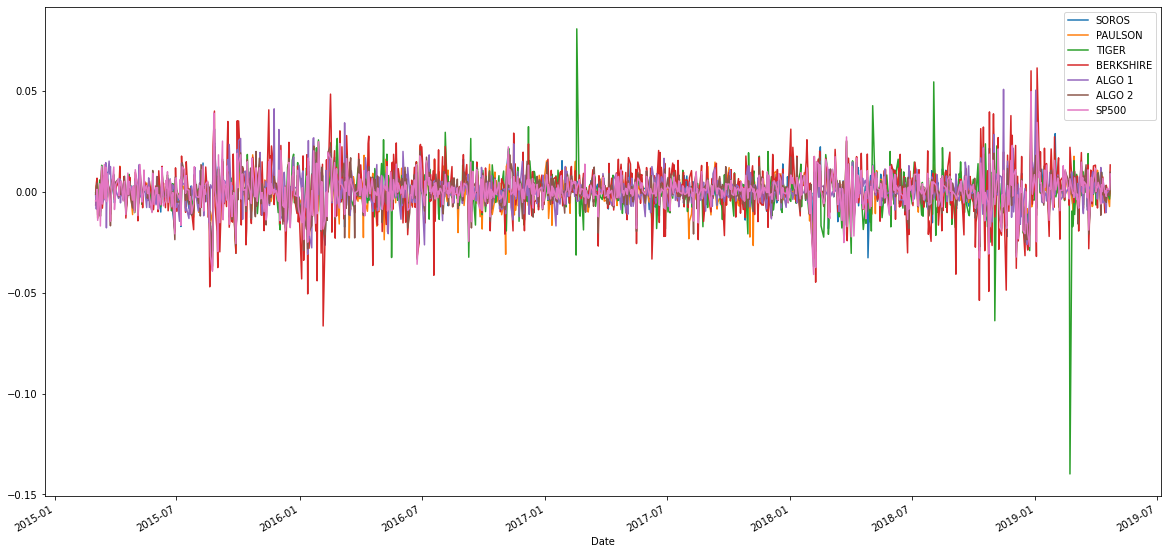

In [34]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

In [35]:
# Calculate cumulative returns of all portfolios
all_cum_returns = (1 + all_portfolios).cumprod() - 1
all_cum_returns.head()


,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


<AxesSubplot:title={'center':'Cumulative Returns of all portfolios since March 2015)'}, xlabel='Date'>

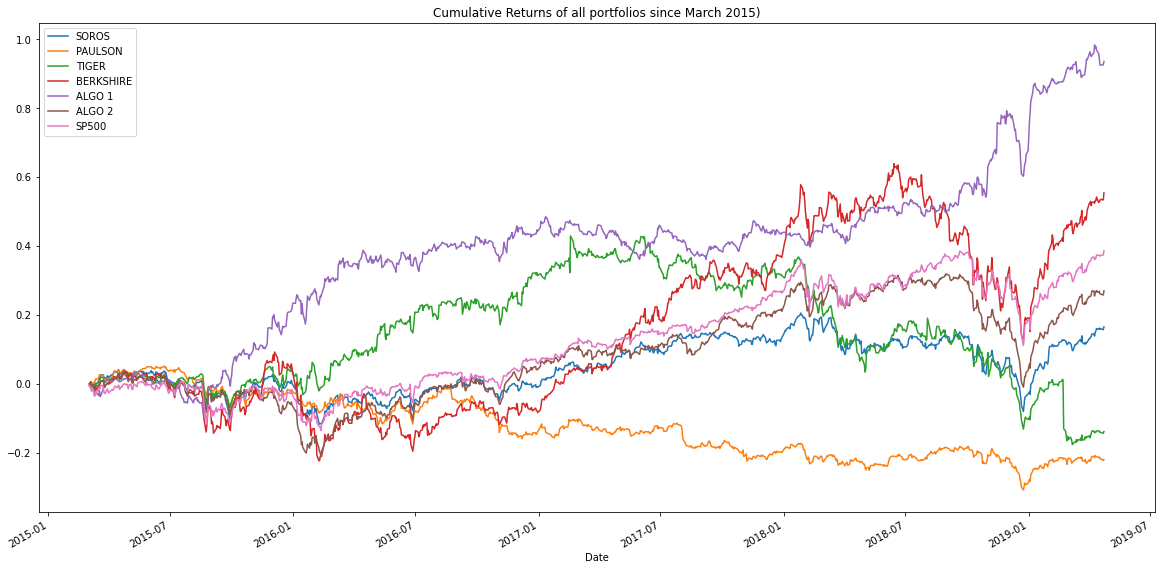

In [36]:
# Plot cumulative returns
all_cum_returns.plot(figsize=(20,10), title="Cumulative Returns of all portfolios since March 2015)")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

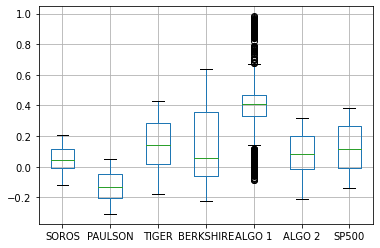

In [37]:
# Create a Box plot of all portfolios demonsrating the median cumulative returns for each portfolio, Q1 and Q3 values and range of values over the reporting period 
all_cum_returns.boxplot()

### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios and sort in order from lowest to highest
all_portfolios_std = all_portfolios.std()
all_portfolios_std.sort_values(inplace=True)
all_portfolios_std

PAULSON      0.007023
ALGO 1       0.007620
SOROS        0.007895
ALGO 2       0.008342
SP500        0.008554
TIGER        0.010894
BERKSHIRE    0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [40]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns.std()

SP500_Close    0.008111
dtype: float64

In [41]:
sp500_std_risk = all_portfolios["SP500"].std()
sp500_std_risk

0.008553731597758204

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized standard deviation (252 trading days)
all_std_annual = all_portfolios_std * np.sqrt(252)
all_std_annual.sort_values(inplace=True)
all_std_annual

PAULSON      0.111488
ALGO 1       0.120967
SOROS        0.125335
ALGO 2       0.132430
SP500        0.135786
TIGER        0.172936
BERKSHIRE    0.205077
dtype: float64

In [ ]:
# Based on to Cumulatyive Return standard deviation of the portfolios, Tiger and Berkshire are higher risk

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#all_port_daily_std = all_portfolios.std()
all_rolling_21 = all_portfolios.rolling(window=21).std()
all_rolling_21
# Plot the rolling standard deviation
#all_port_daily_std

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:title={'center':'All Portfolio 21 Day Rolling STD)'}, xlabel='Date'>

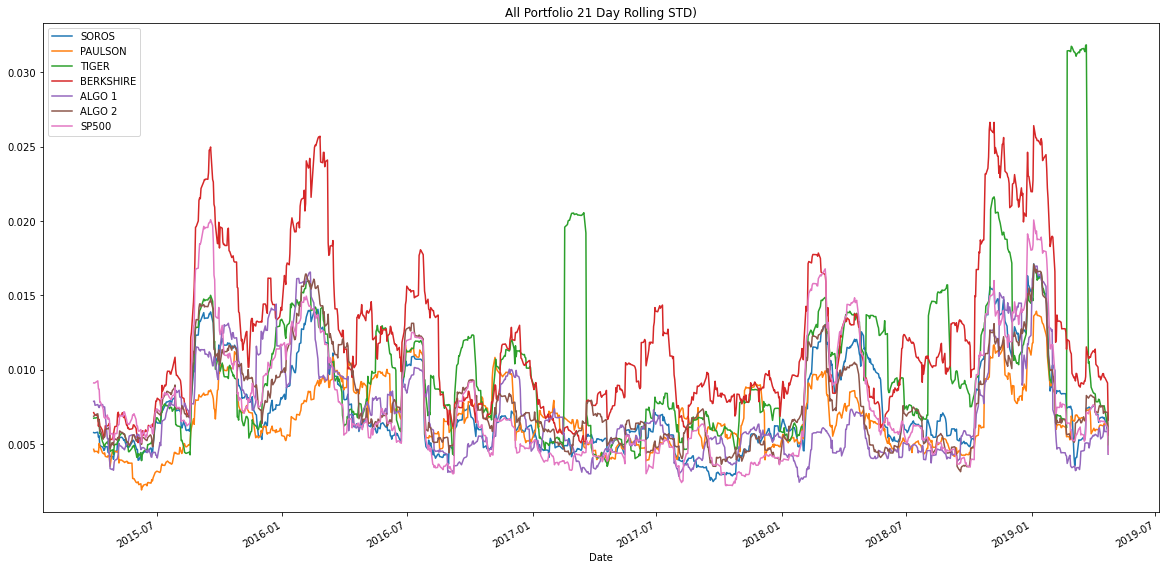

In [44]:
# Plot 21 Rolling Daily Standard Deviation
all_rolling_21.plot(figsize=(20,10), title="All Portfolio 21 Day Rolling STD)")

### Calculate and plot the correlation

In [45]:
# Calculate the correlation and display the matrix
all_portfolios_correlation = all_portfolios.corr()

all_portfolios_correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
ALGO 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
ALGO 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

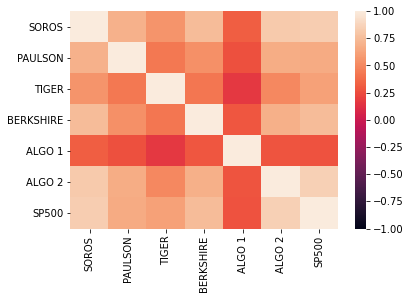

In [46]:
#Plot a heat mapo of the correlations
sns.heatmap(all_portfolios_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [47]:
# Calculate covariance of the Agorithm1 portfolio
algo1_covariance = all_portfolios['ALGO 1'].cov(all_portfolios['SP500'])
algo1_covariance

1.821774999163274e-05

In [48]:
# Calculate variance of S&P 500
sp500_variance = all_portfolios['SP500'].var()
sp500_variance

7.316632424648712e-05

In [49]:
# Computing beta of all daily returns for the Algorithm 1 portfolio vs. S&P 500
algo1_beta = algo1_covariance / sp500_variance
print(f"ALGO 1 Beta: {algo1_beta}")

ALGO 1 Beta: 0.24899091459425635


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1 Portfolio'}, xlabel='Date'>

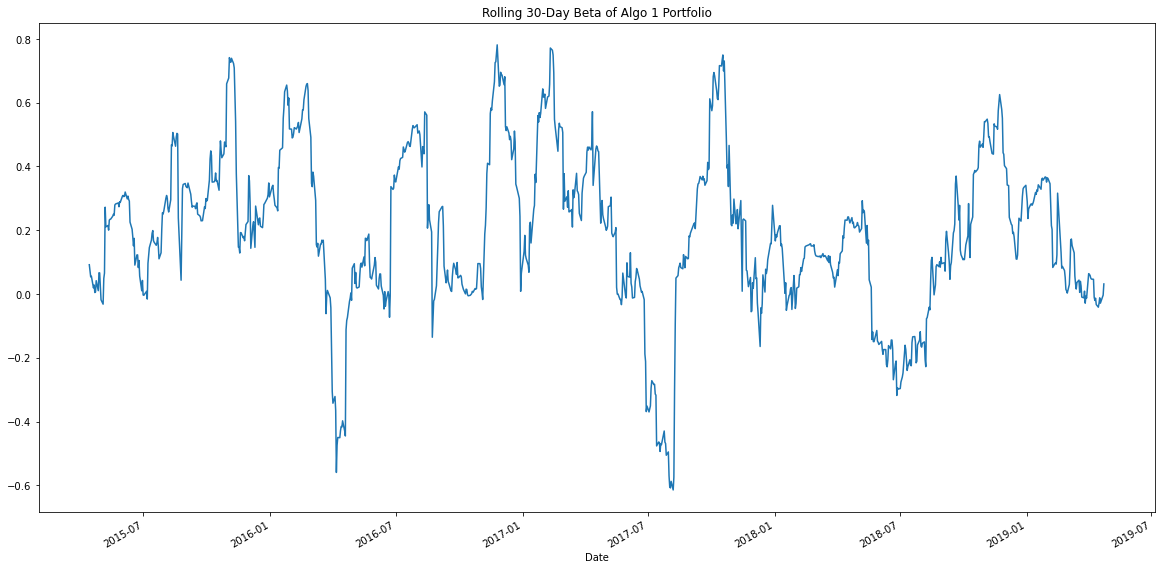

In [50]:
# Plot Algorithm 1 beta trend
# algo1_beta.plot(figsize=(20,10), title="Beta Trend: Algo 1 vs S&P 500)")
rolling_algo1_covariance = all_portfolios['ALGO 1'].rolling(window=30).cov(all_portfolios['SP500'])
rolling_sp500_variance = all_portfolios['SP500'].rolling(window=30).var()
rolling_algo1_beta = rolling_algo1_covariance / rolling_sp500_variance
rolling_algo1_beta.plot(figsize=(20,10), title='Rolling 30-Day Beta of Algo 1 Portfolio')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'EMW 21 Day Beta of Algo 1 Portfolio'}, xlabel='Date'>

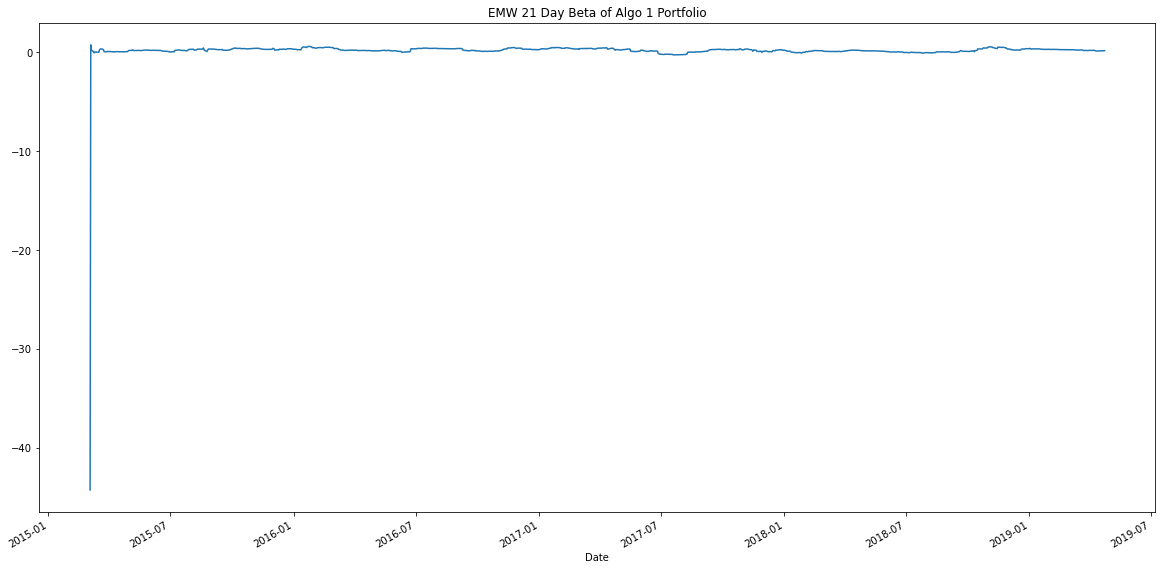

In [51]:
# Use `ewm` to calculate the rolling window
emw_21_algo1_cov = all_portfolios['ALGO 1'].ewm(halflife=21).cov(all_portfolios['SP500'])
emw_sp500_variance = all_portfolios['SP500'].ewm(halflife=21).var()
emw_algo1_beta = emw_21_algo1_cov / emw_sp500_variance
emw_algo1_beta.plot(figsize=(20,10), title='EMW 21 Day Beta of Algo 1 Portfolio')


In [52]:
emw_algo1_beta

Date
2015-03-03          NaN
2015-03-04   -44.280803
2015-03-05     0.748470
2015-03-06     0.207397
2015-03-09     0.075728
                ...    
2019-04-16     0.130871
2019-04-17     0.151652
2019-04-18     0.151426
2019-04-22     0.151399
2019-04-23     0.165705
Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Annualized Sharpe Ratios
all_port_sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
all_port_sharpe_ratios

SOROS        0.356417
PAULSON     -0.483570
TIGER       -0.121060
BERKSHIRE    0.621810
ALGO 1       1.378648
ALGO 2       0.501364
SP500        0.648267
dtype: float64

<AxesSubplot:title={'center':'All Portfoilo Sharpe Ratio'}>

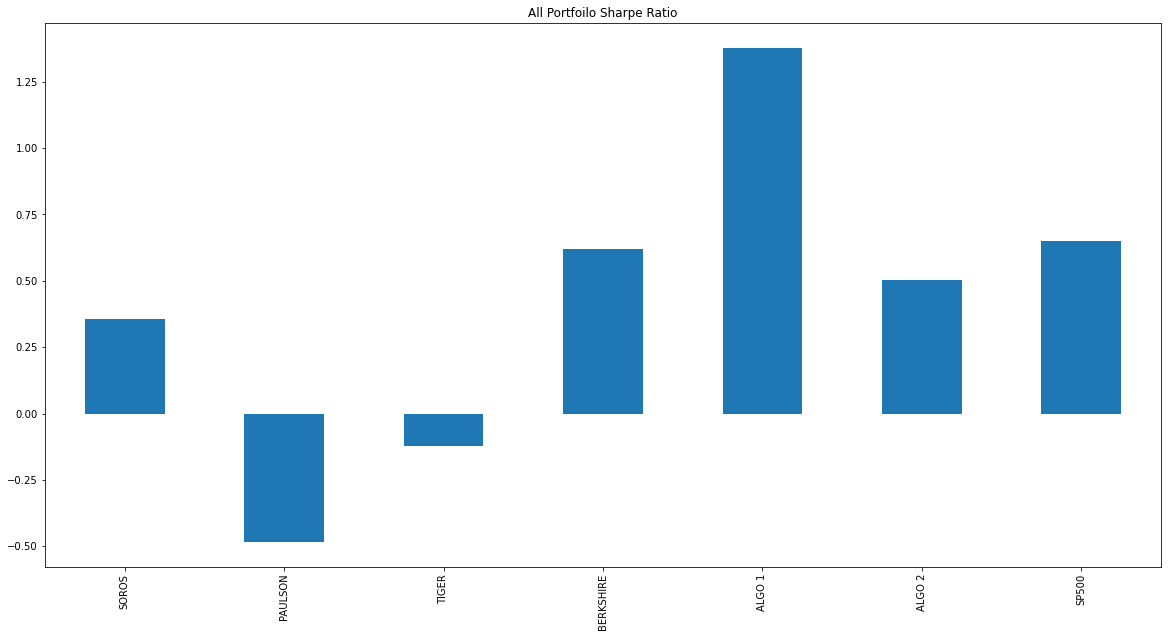

In [54]:
#All Portfolio Sharpe Ratios as a bar plot
all_port_sharpe_ratios.plot(kind="bar", figsize=(20,10), title='All Portfoilo Sharpe Ratio')



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
# Algorithm 1 outperforms the SP500 on all metrics - returns, volatility, Sharpe Ratio and has very low correlation with S&P 500.
#Algorithm 2 has a very stromg correlation with the S&P 500 and similar performance across all metrics.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [55]:
# Creating a path from 1st stock which is Amazon (AMZN)
amzn_path = Path("Resources/amzn_stock.csv")

In [56]:
# Reading AMZN data
amzn_df = pd.read_csv(amzn_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
#amzn_df.sort_index(inplace=True)
amzn_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400
2015-01-09,301.480011,302.869995,296.679993,296.929993,296.929993,2592400
2015-01-12,297.559998,298.510010,289.279999,291.410004,291.410004,3421400
2015-01-13,297.480011,301.500000,293.230011,294.739990,294.739990,4136400
2015-01-14,291.929993,295.910004,286.500000,293.269989,293.269989,5538700


In [57]:
#Keep only Date and Close columns
amzn_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
amzn_df.head()

,Close
Date,
2015-01-02,308.519989
2015-01-05,302.190002
2015-01-06,295.290009
2015-01-07,298.420013
2015-01-08,300.459991


In [58]:
#Determine number of null values
amzn_df.isnull().sum()

Close    0
dtype: int64

In [59]:
# Calculate Daily Returns for Amazon using the pct_change function
amzn_daily_returns = amzn_df.pct_change()
amzn_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.020517
2015-01-06,-0.022833
2015-01-07,0.010600
2015-01-08,0.006836


In [60]:
# Creating a path from 2nd stock which is PayPal (pypl)
pypl_path = Path("Resources/pypl_stock.csv")

In [61]:
# Reading data from 2nd stock which is PayPal (PYPL)
# Reading  returns
pypl_df = pd.read_csv(pypl_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
pypl_df.sort_index(inplace=True)
pypl_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-07,37.720001,37.810001,36.000000,36.619999,36.619999,7359000
2015-07-08,36.340000,36.360001,34.529999,34.700001,34.700001,5387700
2015-07-09,35.099998,35.520000,33.990002,34.500000,34.500000,3760100
2015-07-10,34.660000,35.189999,33.980000,34.689999,34.689999,4472800
2015-07-13,35.590000,37.500000,35.500000,36.779999,36.779999,7626000
2015-07-14,36.990002,37.740002,36.599998,36.930000,36.930000,4653300
2015-07-15,37.980000,38.200001,37.029999,37.509998,37.509998,13072800
2015-07-16,38.820000,39.970001,38.080002,38.630001,38.630001,21348500
2015-07-17,39.419998,40.200001,38.180000,38.389999,38.389999,45720200


In [62]:
# Keep only the close and date columns
pypl_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
pypl_df.head()

,Close
Date,
2015-07-07,36.619999
2015-07-08,34.700001
2015-07-09,34.500000
2015-07-10,34.689999
2015-07-13,36.779999


In [63]:
#Determine number of null values
pypl_df.isnull().sum()

Close    0
dtype: int64

In [64]:
# Calculate Daily Returns for PayPal using the pct_change function
pypl_daily_returns = pypl_df.pct_change()
pypl_daily_returns.head()

,Close
Date,
2015-07-07,NaN
2015-07-08,-0.052430
2015-07-09,-0.005764
2015-07-10,0.005507
2015-07-13,0.060248


In [65]:
# Reading data from 3rd stock
#Creating a path from 3rd stock which is Southern Copper (SCCO)
scco_path = Path("Resources/scco_stock_2.csv")

In [67]:
# # Reading data from SCCO
scco_df = pd.read_csv(scco_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
scco_df.sort_index(inplace=True)
scco_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,28.059999,28.590000,28.010000,28.440001,24.049593,1257200
2015-01-05,27.910000,27.969999,26.900000,27.040001,22.865719,1880100
2015-01-06,27.040001,27.480000,26.980000,27.070000,22.891085,2306300
2015-01-07,27.139999,27.670000,26.980000,27.540001,23.288530,1296000
2015-01-08,27.799999,28.420000,27.670000,28.330000,23.956570,1166400
2015-01-09,28.350000,28.549999,28.230000,28.379999,23.998856,882200
2015-01-12,27.920000,28.100000,27.299999,27.889999,23.584501,1826300
2015-01-13,27.530001,27.719999,26.280001,26.549999,22.451363,3595300
2015-01-14,24.850000,25.639999,23.600000,25.559999,21.614191,8284100


In [68]:
# Keep only the close and date columns
scco_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
scco_df.head()

,Close
Date,
2015-01-02,28.440001
2015-01-05,27.040001
2015-01-06,27.070000
2015-01-07,27.540001
2015-01-08,28.330000


In [69]:
#Determine number of null values
scco_df.isnull().sum()

Close    0
dtype: int64

In [70]:
# Calculate Daily Returns for PayPal using the pct_change function
scco_daily_returns = scco_df.pct_change()
scco_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.049226
2015-01-06,0.001109
2015-01-07,0.017362
2015-01-08,0.028686


In [71]:
# Combine all stocks in a single DataFrame
david_portfolio_df = pd.concat([amzn_df, pypl_df, scco_df], axis="columns", join="inner")
david_portfolio_df.head()

,Close,Close,Close
Date,,,
2015-07-07,436.720001,36.619999,28.910000
2015-07-08,429.700012,34.700001,28.280001
2015-07-09,434.390015,34.500000,28.160000
2015-07-10,443.510010,34.689999,28.480000
2015-07-13,455.570007,36.779999,29.320000


In [72]:
# Check Data Types
david_portfolio_df.dtypes

Close    float64
Close    float64
Close    float64
dtype: object

In [73]:
# Reset Date index
#david_portfolio_df.sort_index(inplace=True)
#david_portfolio_df = david_portfolio_df (index_col='Date')
david_portfolio_df

,Close,Close,Close
Date,,,
2015-07-07,436.720001,36.619999,28.910000
2015-07-08,429.700012,34.700001,28.280001
2015-07-09,434.390015,34.500000,28.160000
2015-07-10,443.510010,34.689999,28.480000
2015-07-13,455.570007,36.779999,29.320000
...,...,...,...
2021-04-22,3309.040039,262.269989,69.120003
2021-04-23,3340.879883,266.029999,71.639999
2021-04-26,3409.000000,271.720001,72.889999


In [74]:
# Reorganize portfolio data by having a column per symbol
david_portfolio_df.columns = ['AMZN', 'PYPL', 'SCCO']
david_portfolio_df.head()

,AMZN,PYPL,SCCO
Date,,,
2015-07-07,436.720001,36.619999,28.910000
2015-07-08,429.700012,34.700001,28.280001
2015-07-09,434.390015,34.500000,28.160000
2015-07-10,443.510010,34.689999,28.480000
2015-07-13,455.570007,36.779999,29.320000


In [75]:
# Calculate daily returns
david_daily_returns = david_portfolio_df.pct_change()
david_daily_returns.head()

# Drop NAs
#Determine number of null values and drop if necessary
#david_daily_returns_df.isnull().sum()
#david_daily_returns_df.dropna(inplace=True)
# Display sample data
#david_daily_returns

,AMZN,PYPL,SCCO
Date,,,
2015-07-07,NaN,NaN,NaN
2015-07-08,-0.016074,-0.052430,-0.021792
2015-07-09,0.010915,-0.005764,-0.004243
2015-07-10,0.020995,0.005507,0.011364
2015-07-13,0.027192,0.060248,0.029494


In [76]:
# Determining number of nulls
david_daily_returns.isnull().sum()

AMZN    1
PYPL    1
SCCO    1
dtype: int64

In [77]:
david_daily_returns.dropna(inplace=True)
david_daily_returns

,AMZN,PYPL,SCCO
Date,,,
2015-07-08,-0.016074,-0.052430,-0.021792
2015-07-09,0.010915,-0.005764,-0.004243
2015-07-10,0.020995,0.005507,0.011364
2015-07-13,0.027192,0.060248,0.029494
2015-07-14,0.021951,0.004078,-0.004093
...,...,...,...
2021-04-22,-0.015758,-0.009891,-0.040932
2021-04-23,0.009622,0.014336,0.036458
2021-04-26,0.020390,0.021389,0.017448


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [78]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
david_daily_returns_wt = david_daily_returns.dot(weights)
david_daily_returns_wt.head()
# Display sample data


Date
2015-07-08   -0.030099
2015-07-09    0.000303
2015-07-10    0.012622
2015-07-13    0.038978
2015-07-14    0.007312
dtype: float64

In [79]:
david_daily_returns_wt.dropna()

Date
2015-07-08   -0.030099
2015-07-09    0.000303
2015-07-10    0.012622
2015-07-13    0.038978
2015-07-14    0.007312
                ...   
2021-04-22   -0.022194
2021-04-23    0.020139
2021-04-26    0.019742
2021-04-27   -0.002322
2021-04-28    0.007003
Length: 1463, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [80]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_df = pd.concat([all_portfolios, david_daily_returns_wt], axis="columns", join="inner")
combined_portfolio_df.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'ALGO 1', 'ALGO 2', 'SP500', 'DAVID']
combined_portfolio_df

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500,DAVID
Date,,,,,,,,
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.030099
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.000303
2015-07-10,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,0.012338,0.012622
2015-07-13,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,0.011066,0.038978
2015-07-14,0.004872,0.004467,0.002888,0.001856,0.005465,0.003058,0.004458,0.007312
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008802
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.006802
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.011455


In [81]:
# Reset Date index
#david_portfolio_df.sort_index(inplace=True)
#david_portfolio_df = david_portfolio_df (index_col='Date')
#david_portfolio_df

In [82]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#Determine number of null values and drop if necessary
combined_portfolio_df.isnull().sum()
#combined portfolio_df.dropna(inplace=True)
# Display sample data
combined_portfolio_df

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500,DAVID
Date,,,,,,,,
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.030099
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.000303
2015-07-10,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,0.012338,0.012622
2015-07-13,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,0.011066,0.038978
2015-07-14,0.004872,0.004467,0.002888,0.001856,0.005465,0.003058,0.004458,0.007312
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008802
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.006802
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.011455


In [83]:
# Calculate cumulative returns of the combined portfolios
combined_cum_returns = (1 + combined_portfolio_df).cumprod() - 1
combined_cum_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500,DAVID
Date,,,,,,,,
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.030099
2015-07-09,-0.009868,-0.003797,-0.014353,0.005725,0.000042,-0.011961,-0.014428,-0.029805
2015-07-10,-0.000988,-0.000222,-0.000944,0.012781,0.003404,0.002249,-0.002268,-0.017560
2015-07-13,0.006950,0.000927,0.007706,0.023089,0.007634,0.010843,0.008773,0.020734
2015-07-14,0.011856,0.005398,0.010617,0.024988,0.013140,0.013935,0.013270,0.028198


<AxesSubplot:title={'center':'Cumulative Returns of Combined Portfolio since March 2015)'}, xlabel='Date'>

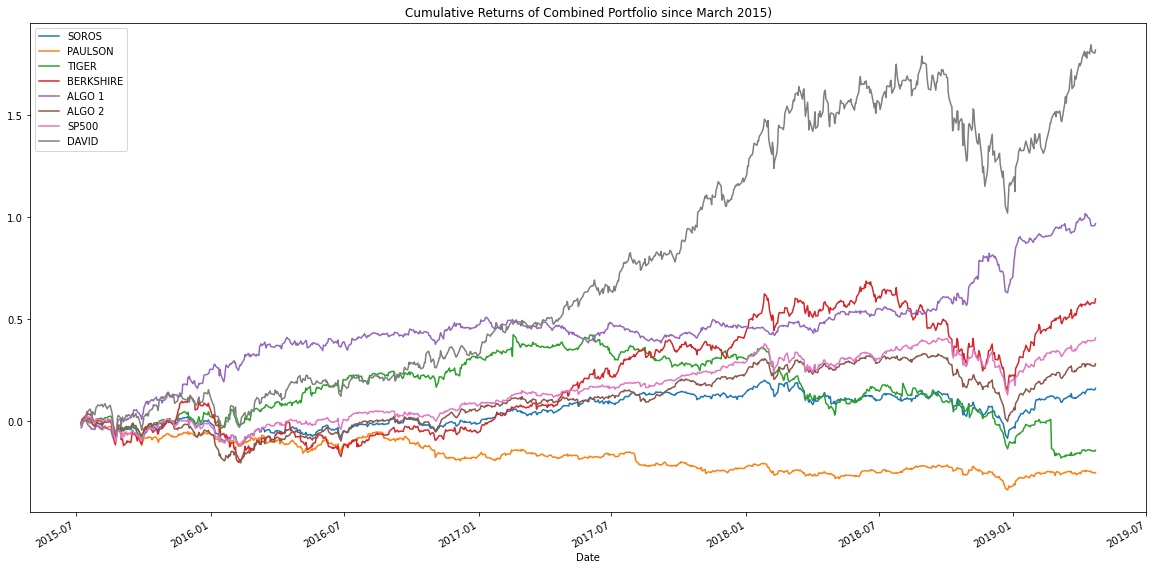

In [84]:
# Plot cumulative returns of the combvined portfolio
combined_cum_returns.plot(figsize=(20,10), title="Cumulative Returns of Combined Portfolio since March 2015)")

<AxesSubplot:>

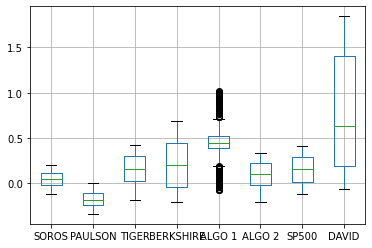

In [85]:
# Create a Box plot of all portfolios demonstrating the median cumulative returns for each portfolio, Q1 and Q3 values and range of values over the reporting period 
combined_cum_returns.boxplot()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [86]:
# Calculate the daily standard deviations of combined portfolio and sort in order from lowest to highest
combined_portfolio_std = combined_portfolio_df.std()
combined_portfolio_std.sort_values(inplace=True)
combined_portfolio_std

PAULSON      0.007251
ALGO 1       0.007774
SOROS        0.008096
ALGO 2       0.008524
SP500        0.008683
TIGER        0.011259
BERKSHIRE    0.013346
DAVID        0.014138
dtype: float64

In [87]:
# Calculate the annualized `std`
combined_std_annual = combined_portfolio_std * np.sqrt(252)
combined_std_annual.sort_values(inplace=True)
combined_std_annual

PAULSON      0.115100
ALGO 1       0.123413
SOROS        0.128519
ALGO 2       0.135315
SP500        0.137832
TIGER        0.178734
BERKSHIRE    0.211864
DAVID        0.224431
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [88]:
# Calculate the rolling standard deviation for the Combined Portfolio using a 21-day window
combined_rolling_21 = combined_portfolio_df.rolling(window=21).std()
combined_rolling_21

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500,DAVID
Date,,,,,,,,
2015-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498,0.011895
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537,0.011648
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470,0.011903


<AxesSubplot:title={'center':'Combined Portfolio 21 Day Rolling STD'}, xlabel='Date'>

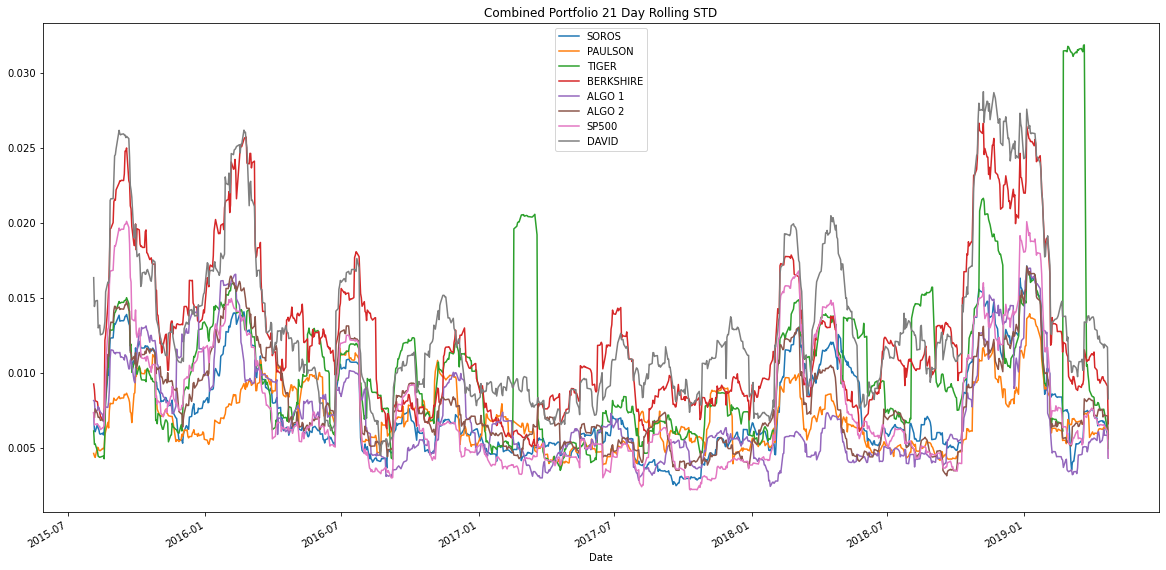

In [89]:
# Plot the 21 Day Rolling Daily Standard Deviation for the Combined Portfolio
combined_rolling_21.plot(figsize=(20,10), title="Combined Portfolio 21 Day Rolling STD")

### Calculate and plot the correlation

In [90]:
# Calculate the correlation for the Combined Portfolio
combined_portfolio_correlation = combined_portfolio_df.corr()
combined_portfolio_correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP500,DAVID
SOROS,1.000000,0.699969,0.554392,0.753916,0.326963,0.827455,0.839394,0.697350
PAULSON,0.699969,1.000000,0.427938,0.543987,0.278249,0.679693,0.672428,0.528555
TIGER,0.554392,0.427938,1.000000,0.417391,0.166799,0.497578,0.615689,0.424128
BERKSHIRE,0.753916,0.543987,0.417391,1.000000,0.297323,0.685994,0.755658,0.721455
ALGO 1,0.326963,0.278249,0.166799,0.297323,1.000000,0.299189,0.287068,0.279236
ALGO 2,0.827455,0.679693,0.497578,0.685994,0.299189,1.000000,0.859090,0.692427
SP500,0.839394,0.672428,0.615689,0.755658,0.287068,0.859090,1.000000,0.783040
DAVID,0.697350,0.528555,0.424128,0.721455,0.279236,0.692427,0.783040,1.000000


<AxesSubplot:>

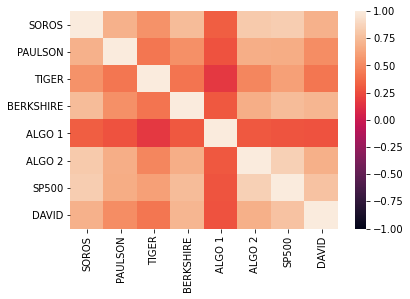

In [91]:
#Plot a heat mapo of the Combined Portfolio correlations
sns.heatmap(combined_portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [92]:
# Calculate covariance of the David portfolio
david_covariance = combined_portfolio_df['DAVID'].cov(combined_portfolio_df['SP500'])
david_covariance

9.612062905052126e-05

In [93]:
# Computing beta of all daily returns for the David portfolio vs. S&P 500
david_beta = david_covariance / sp500_variance
print(f"DAVID BETA: {david_beta}")

DAVID BETA: 1.3137277298050984


<AxesSubplot:title={'center':'Rolling 60-Day Beta of David Portfolio'}, xlabel='Date'>

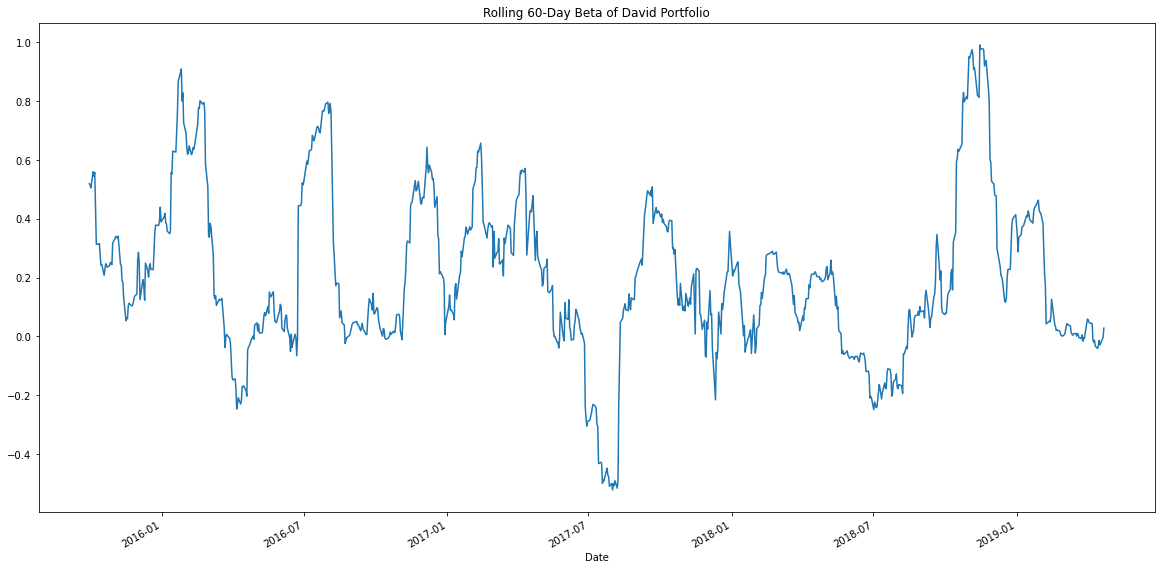

In [94]:
# Plot the beta trend for David Portfolio vs S&P 500
rolling_david_covariance = combined_portfolio_df['DAVID'].rolling(window=60).cov(combined_portfolio_df['SP500'])
rolling_sp500_variance = combined_portfolio_df['SP500'].rolling(window=60).var()
rolling_david_beta = rolling_algo1_covariance / rolling_sp500_variance
rolling_david_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of David Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
combined_port_sharpe_ratios = (combined_portfolio_df.mean() * 252) / (combined_portfolio_df.std() * np.sqrt(252))
combined_port_sharpe_ratios.sort_values(ascending=False, inplace=True)
# Display a few rows
combined_port_sharpe_ratios

ALGO 1       1.510456
DAVID        1.331566
SP500        0.726253
BERKSHIRE    0.692009
ALGO 2       0.553194
SOROS        0.373510
TIGER       -0.133553
PAULSON     -0.604225
dtype: float64

<AxesSubplot:title={'center':'All Portfoilo Sharpe Ratio'}>

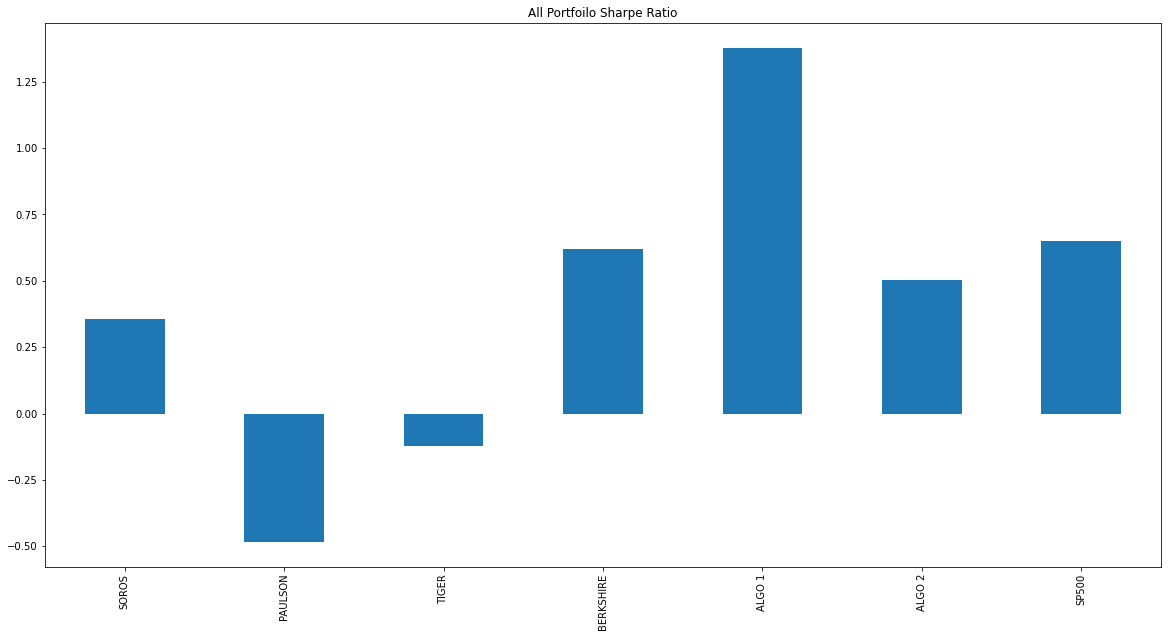

In [96]:
#Plot the Sharpe Ratios for the Combibned Portfoias a bar plot
all_port_sharpe_ratios.plot(kind="bar", figsize=(20,10), title='All Portfoilo Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

In [97]:
# Compared to the other portfolios, David Portfolio is much higher risk/highly volatile, having a significantly higher standard deviation and range of cumulative retuerns
# Correlation of David vs S&P500 is close to 1 and with Beta of 1.3, the portfolio follows the S&P indices closley but with greater gains when these occur.
# Aprt from Algorithm 1, David has a strong correlation to all other protfolios. 
# Despite being a volatile portfolio, David gives an impressive return relative to all other portfolios, with the highest median cumulative returns.ond only to Algorithm 1, and sharpe ratio only second to Algorithm 1, indicating that the risk-reward is positive.
# With a high Sharpoe Ratio, the risk-reward of the portfolio seems appropriate given the volatility and good returns.